<a href="https://colab.research.google.com/github/Indukurivigneshvarma/Deep_Learning/blob/main/Computer_Vision/Efficient_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision timm -q

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from timm import create_model
import matplotlib.pyplot as plt

In [3]:
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

classes = trainset.classes
print("Classes:", classes)

100%|██████████| 170M/170M [00:04<00:00, 42.6MB/s]


Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = create_model('efficientnet_b0', pretrained=True)
model.classifier = nn.Linear(model.classifier.in_features, 10)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

from google.colab import output
output.clear()

In [6]:
epochs = 3

for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(trainloader):.4f}")

print("✅ Training Complete")

Epoch [1/3], Loss: 0.3673
Epoch [2/3], Loss: 0.0942
Epoch [3/3], Loss: 0.0439
✅ Training Complete


In [7]:
correct = 0
total = 0
model.eval()

with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"🎯 Accuracy on test images: {100 * correct / total:.2f}%")

🎯 Accuracy on test images: 96.10%


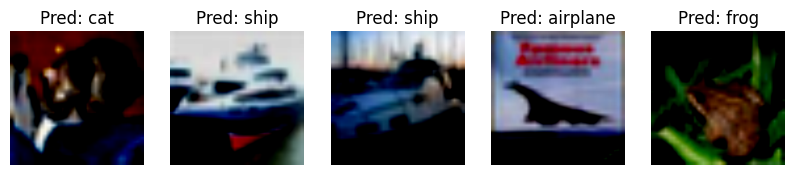

In [10]:
import numpy as np

dataiter = iter(testloader)
images, labels = next(dataiter)

model.eval()
outputs = model(images.to(device))
_, preds = torch.max(outputs, 1)

plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(np.transpose(images[i], (1, 2, 0)))
    plt.title(f"Pred: {classes[preds[i]]}")
    plt.axis('off')
plt.show()